# Rolling Stones Experiment
This experiment will be used to see whether gradient dissent can find the most efficient shape of a round object to roll down a given hill. We will be using gradient dissent to try and minimize the time it takes for a simulated boulder to roll down a hill. 

The round objects will be composed of N radii, evenly spread throughout the circle starting at the top. these radii will be of different sizes which will change the shape of the object. 

## Imports

In [66]:
import pymunk
#import pymunk.pygame_util
import pymunk.matplotlib_util
from pymunk.vec2d import Vec2d
from numpy import random
import numpy

import sys

import matplotlib as mpl
from matplotlib import animation

#import matplotlib.pyplot as plt
#from matplotlib import animation
from IPython.display import HTML

## Stone object

This is rudimentary, the base Radii will be stored as a matrix of size [S, N] where S is the number of stones and N is the number of radii. The mutation chance and mutation ammount control how frequently mutations are made and how much they are changed.

In [122]:
class Stone:
    """An object to handle stone attributes"""
    
    def __init__(self, N, baseRadii, mutationChance, mutationAmmount):
        self.radii = []
        self.vs = []
        for x in range(N):
            r = random.rand()
            mutate = numpy.floor(r/mutationChance)
            sign = numpy.sign(random.rand()-0.5)
            
            self.radii.append(baseRadii[x] + mutationAmmount * mutate * sign)
            
        self.mass = 1;
        self.vs = self.calcVertices(self.radii)
        self.moment = pymunk.moment_for_poly(self.mass, self.vs)
        self.body = pymunk.Body(self.mass, self.moment)
        self.shape = pymunk.Poly(self.body, self.vs)
        self.shape.friction = 0.7
        self.shape.collision_type = 1
        self.timeEnd = 0
        #self.shape.elasticity = 0.9999999
        
        
        
    def setRadii(self, newRadii):
        self.radii = newRadii
        
    def getRadii(self):
        return self.radii
    
    def calcVertices(self, radii):
        """Calculate the VS for PyMunk given the radii"""
        angleDif = 2 * numpy.pi / N
        vs = []
        for x in range(len(radii)):
            v = (radii[x] * numpy.sin(x*angleDif), radii[x] * numpy.cos(x*angleDif))
            vs.append(v)
        return vs
    
            

## Hill Object
an object to hold the hill that the ball will ride down on

In [131]:
class Hill:
    def __init__(self, N, width, height):
        self.vs = [(0, 0)]
        for x in range(N):
            v = (x*(N/width), height-(x*(N/height)))
            self.vs.append(v)
            if(x%2==0):
                v = (x*(N/width), height-(x*(N/height) + 100))
                self.vs.append(v)
        self.mass = 1
        self.moment = pymunk.moment_for_poly(self.mass, self.vs)
        self.body = pymunk.Body(self.mass, self.moment)
        self.body.body_type = pymunk.Body.STATIC
        self.shape = pymunk.Poly(self.body, self.vs)
        self.shape.friction = 0.7
        self.shape.collision_type = 1
        #self.shape.elasticity = 0.9999999
        

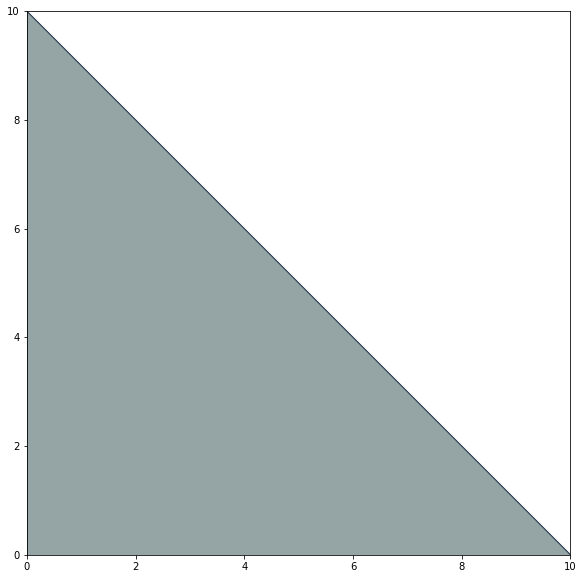

In [132]:
Nstone = 32
Nhill = 16
baseRadii = []
for x in range(Nstone):
    baseRadii.append(1.0)
mutationChance = .5
mutationAmmount = .02
width, height = 10, 10

testStone = Stone(Nstone, baseRadii, mutationChance, mutationAmmount)
testHill = Hill(Nhill, width, height)
testStone.body.position = Vec2d(1, 10.5)

#print(testStone.getRadii());
#print(testStone.calcVertices(testStone.getRadii()))

#testStone.body.position = width/2, height/2
#testStone.body.start_position = Vec2d(testStone.body.position)

### Set up pymunk and matplotlib
space = pymunk.Space()   
space.gravity = 0,-15 #not sure how large this should be?
space.damping = 0.99 # not sure what this does
space.add(testStone.body, testStone.shape)
space.add(testHill.body, testHill.shape)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'aspect': 'equal'})

# set the size of the axes
ax1.set_xlim([0, width])
ax1.set_ylim([0, height])
options = pymunk.matplotlib_util.DrawOptions(ax1)

### Draw the polygon
#options.draw_polygon(testStone.vs, 2, (0, 0, 0, 1), (1, 0, 0, 1))
#space.debug_draw(options)

timeEnd = 0
def init():
    space.debug_draw(options)
    return []

def animate(dt):
    for x in range(10):
        space.step(.1/30) #no fucking clue why 0.05/100. copypasted from a tutorial.
            
    ax1.clear() #clear() seems to remove the axes limits, so we need to replace those
    ax1.set_xlim([0, width])
    ax1.set_ylim([0, height])
    space.debug_draw(options)
    return []

frames = 30 * 5
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=32, blit=False)
#print("timeEnd: " + str(testStone.timeEnd))

HTML(anim.to_html5_video())

    


In [121]:
""" 
Create stones
    baseRadii: 2d Array of radii
"""
def makeStones(baseRadii, mutationChance, mutationAmmount):
    stones=[]
    for x in range(len(baseRadii)):
        stones.append(Stone(len(baseRadii[x]), baseRadii[x], mutationChance, mutationAmmount))
    return stones

In [ ]:
baseRadii=[]
S = 50
N = 10
mutationChance = 0.7
mutationAmmount = .3

for i in range(S):
    radii = []
    for j in range(N):
        radii.append(1.0)
    baseRadii.append(radii)
    
stones = makeStones(baseRadii, mutationChance, mutationAmmount)

for G in range(10):
    print("Generation " + str(G))
    baseRadii = []
    for stone in stones:
        print(stone.getRadii())
        baseRadii.append(stone.getRadii())
        
    stones = makeStones(baseRadii, mutationChance, mutationAmmount)
    

    
        

In [ ]:
testStone = Stone()

## PyGame tutorial
https://pythonprogramming.net/pygame-python-3-part-1-intro/

In [ ]:
import pygame

pygame.init()

gameDisplay = pygame.display.set_mode((800,600))
pygame.display.set_caption('A bit Racey')

clock = pygame.time.Clock()

crashed = False

while not crashed:

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            crashed = True

        #print(event)

    pygame.display.update()
    clock.tick(60)
    
pygame.quit()
quit()

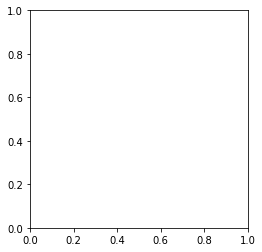

In [65]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9820
    space.damping = 0.99
    return space

def setup_balls(space):
    width = 600
    height = 600
    for x in range(-100,150,50):
        x += width / 2
        offset_y = height/2
        mass = 10
        radius = 25
        moment = pymunk.moment_for_circle(mass, 0, radius, (0,0))
        body = pymunk.Body(mass, moment)
        body.position = x, -125+offset_y
        body.start_position = Vec2d(body.position)
        shape = pymunk.Circle(body, radius)
        shape.elasticity = 0.9999999
        space.add(body, shape)
        pj = pymunk.PinJoint(space.static_body, body, (x, 125+offset_y), (0,0))
        space.add(pj)
        
fig = plt.figure()
ax = plt.axes(xlim=[0, 600], ylim=[0, 600])
ax.set_aspect("equal")

space = setup_space()
setup_balls(space)

o = pymunk.matplotlib_util.DrawOptions(ax)


space.shapes[1].body.apply_impulse_at_local_point((-12000,0))
    
def init():
    space.debug_draw(o)
    return []

def animate(dt):
    #we run the animation with half speed intentionally to make it a little nicer to look at
    for x in range(10):
        space.step(1/50/10/2)
    ax.clear()
    space.debug_draw(o)
    return []

frames = 105
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False)

HTML(anim.to_html5_video())


In [ ]:
import sys
sys.path.insert(1,'c:/code/gh/pymunk')

In [ ]:
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [ ]:
import pymunk
from pymunk.vec2d import Vec2d
import pymunk.matplotlib_util

In [ ]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9820
    space.damping = 0.99
    return space

In [ ]:
def setup_balls(space):
    width = 600
    height = 600
    for x in range(-100,150,50):
        x += width / 2
        offset_y = height/2
        mass = 10
        radius = 25
        moment = pymunk.moment_for_circle(mass, 0, radius, (0,0))
        body = pymunk.Body(mass, moment)
        body.position = x, -125+offset_y
        body.start_position = Vec2d(body.position)
        shape = pymunk.Circle(body, radius)
        shape.elasticity = 0.9999999
        space.add(body, shape)
        pj = pymunk.PinJoint(space.static_body, body, (x, 125+offset_y), (0,0))
        space.add(pj)

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")

space = setup_space()
setup_balls(space)

o = pymunk.matplotlib_util.DrawOptions(ax)


space.shapes[1].body.apply_impulse_at_local_point((-12000,0))
    
def init():
    space.debug_draw(o)
    return []

def animate(dt):
    #we run the animation with half speed intentionally to make it a little nicer to look at
    for x in range(10):
        space.step(1/50/10/2)
    ax.clear()
    space.debug_draw(o)
    return []

frames = 105
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False)

HTML(anim.to_html5_video())